In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
import pandas as pd

# Read the initial dataset first
file_path = "postings.csv"

df = pd.read_csv(file_path)

# Check the first few rows
print(df.head(10))

dataset_overview = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Missing Values": df.isnull().sum().sum(),
    "Duplicate Rows": df.duplicated().sum(),
    "Columns with Missing Values": df.isnull().sum()[df.isnull().sum() > 0].to_dict(),
}
print(dataset_overview)


       job_id                    company_name                         title  \
0    11009123               PGAV Destinations             project architect   
1    69333422                 Staffing Theory     product marketing manager   
2   133130219                             NaN             software engineer   
3   175485704                            GOYT             software engineer   
4   266825034              Recruitment Design   software support specialist   
5  2234533717                     Ideando Inc           full stack engineer   
6  2457183642         Galerie Candy and Gifts     quality assurance manager   
7  2735151240                LT Apparel Group    intern- business analytics   
8  2987175317  W.C. Construction Company, LLC  construction project manager   
9  3045980831          Armstrong Builders LLC              project engineer   

                                         description  max_salary pay_period  \
0  PGAV Destinations is seeking a self-motivated ..

### This is useless for now

In [3]:
# # Job Title & Industry Distribution 
# top_job_titles = df['title'].value_counts().head(20)

# # Skill Analysis (Extracting Skills)
# df['skills_desc'].fillna('', inplace=True)  # Fill NaN values with empty string
# all_skills_text = ' '.join(df['skills_desc'].dropna().astype(str))
# word_tokens = word_tokenize(all_skills_text.lower())
# filtered_skills = [word for word in word_tokens if word.isalpha() and word not in stopwords.words('english')]
# skill_counts = Counter(filtered_skills).most_common(20)

# # Salary Analysis & Standardization
# def standardize_salary(row):
#     if pd.notnull(row['max_salary']) and pd.notnull(row['pay_period']):
#         if row['pay_period'] == 'HOURLY':
#             return row['max_salary'] * 40 * 52  # Convert hourly wage to annual salary
#         elif row['pay_period'] == 'MONTHLY':
#             return row['max_salary'] * 12  # Convert monthly salary to annual salary
#         elif row['pay_period'] == 'WEEKLY':
#             return row['max_salary'] * 52  # Convert weekly salary to annual salary
#         else:
#             return row['max_salary']  # Assume yearly if pay_period is already YEARLY
#     return 0

# df['standardized_salary'] = df.apply(standardize_salary, axis=1)
# print(df['standardized_salary'].head(10))


C:\Users\Ray\AppData\Local\Temp\ipykernel_26104\803740588.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skills_desc'].fillna('', inplace=True)  # Fill NaN values with empty string


0        0.0
1        0.0
2        0.0
3        0.0
4    65000.0
5        0.0
6        0.0
7        0.0
8        0.0
9    90000.0
Name: standardized_salary, dtype: float64


In [ ]:
# Using TF-IDF to capture similar job scopes and only store relevant
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
# file_path = "/mnt/data/postings_small.txt"  # Adjust if needed
# df = pd.read_csv(file_path, delimiter="\t", low_memory=False)

# Define relevant job categories
relevant_categories = [
    # **Software Engineering Roles**
    "Software Engineer", "Software Developer", "Software Development Engineer (SDE)",
    "Application Developer", "Backend Engineer", "Frontend Engineer",
    "Full Stack Developer", "Mobile Developer", "Embedded Systems Engineer", "Firmware Engineer",
    "Application Engineer", "Platform Engineer", "Systems Engineer", "Solutions Engineer",
    "Staff Software Engineer", "Senior Software Engineer", "Lead Software Engineer",
    "Principal Software Engineer", "Junior Software Engineer", "Software Architect",
    "Software Test Engineer", "Automation Engineer", "QA Engineer", "Release Engineer",
    "Software Quality Assurance Engineer", "Cloud Solutions Engineer",

    # **Data Science & AI Roles**
    "Data Scientist", "Machine Learning Engineer", "AI Engineer", "Deep Learning Engineer",
    "Computer Vision Engineer", "NLP Engineer", "Generative AI Engineer", "Foundation Model Engineer",
    "ML Research Scientist", "AI Research Scientist", "ML Platform Engineer",
    "ML Ops Engineer", "Machine Learning Infrastructure Engineer",

    # **Data Engineering & Analytics**
    "Data Engineer", "Big Data Engineer", "Data Platform Engineer", "Analytics Engineer",
    "Data Warehouse Engineer", "BI Analyst", "Data Analyst", "Business Intelligence Engineer",

    # **Cloud & DevOps Roles**
    "Cloud Engineer", "DevOps Engineer", "Site Reliability Engineer (SRE)", "Infrastructure Engineer",
    "Observability Engineer", "Kubernetes Engineer", "Cloud Security Engineer",
    "Cloud Architect", "Infrastructure Architect", "Platform Architect",

    # **Cybersecurity & IT Roles**
    "Cybersecurity Engineer", "Security Analyst", "Penetration Tester", "Network Engineer",
    "IT Security Specialist", "Information Security Engineer", "Security Operations Engineer",
    "Cloud Security Engineer",

    # **Management & Agile Roles**
    "Project Manager", "Product Manager", "Program Manager", "Technical Program Manager (TPM)",
    "Scrum Master", "Agile Coach", "Engineering Manager", "Tech Lead", "VP of Engineering",
    "Chief Technology Officer (CTO)", "Chief Information Officer (CIO)", "Technical Lead",

    # **Product & AI Product Management Roles**
    "Technical Product Manager", "AI Product Manager", "Data Product Manager",

    # **UX & Design Roles**
    "UX Designer", "UI Designer", "Product Designer", "Human Factors Engineer",

]


# Convert all text to lowercase for consistency
# df["title"] = df["title"].astype(str).str.lower()
df["title"] = df["title"].astype(str).str.lower().str.replace(r'[^\w\s]', '')  # Remove punctuation
df["title"] = df["title"].str.replace(r'staff|senior|junior|lead', '', regex=True)  # Remove role levels

relevant_categories = [role.lower() for role in relevant_categories]

# Vectorize job titles using TF-IDF
vectorizer = TfidfVectorizer()
title_vectors = vectorizer.fit_transform(df["title"])  # Convert job titles to TF-IDF vectors

# Vectorize the predefined job categories
category_vectors = vectorizer.transform(relevant_categories)

# Compute cosine similarity between job titles and categories
cosine_similarities = cosine_similarity(title_vectors, category_vectors)

# Function to get the best-matching job category
def best_match(index):
    best_idx = cosine_similarities[index].argmax()
    best_score = cosine_similarities[index][best_idx]
    if best_score > 0.5:  # Set threshold to 0.5 (adjustable)
        return relevant_categories[best_idx]
    else:
        return "Other"

# Apply the best match function to each job title
df["matched_category"] = [best_match(i) for i in range(len(df))]

# Display the results
# Filter dataset to keep only rows where matched_category is NOT "Other"
filtered_df = df[df["matched_category"] != "Other"]

# Display the filtered job titles and their matched categories
print(filtered_df[["title", "matched_category"]])


In [ ]:

# Save the cleaned text data to a new file
output_csv = "computing_job_postings.csv"

filtered_df.to_csv(output_csv, index=False, encoding="utf-8")

print(f"✅ Cleaned data saved to {output_csv}")


In [ ]:
# Reimport and read the file, now the df should only have computing related stuff left
file_path = "postings.csv"
df = pd.read_csv(file_path)

In [5]:
# Job Description Length & Structure
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))

# Word Frequency Analysis for Job Descriptions
all_text = ' '.join(df['description'].dropna().astype(str))
word_tokens = word_tokenize(all_text.lower())
filtered_words = [word for word in word_tokens if word.isalpha() and word not in stopwords.words('english')]
word_counts = Counter(filtered_words).most_common(30)

# Text Preprocessing
lemmatizer = WordNetLemmatizer()
df['cleaned_description'] = df['description'].astype(str).apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x.lower()) if word.isalpha() and word not in stopwords.words('english')])
)

print(df['cleaned_description'].head(10))


0    pgav destination seeking highly creative indiv...
1    leading pharmaceutical company committed devel...
2    education bachelor degree software math scienc...
3    job description goyt seeking skilled motivated...
4    driven thrill solving problem offering unparal...
5    location remote company overview skillfit subs...
6    galerie seeking experienced quality assurance ...
7    summer internshipadidas carhartt kid divisionl...
8    primary duty include developing project budget...
9    job description project engineer assist superi...
Name: cleaned_description, dtype: object


300
[('sql', 16), ('aws', 10), ('project management', 4), ('devops', 4), ('excel', 4), ('sop', 4), ('dhl', 3), ('digital', 3), ('pajobs', 3), ('lmt', 3), ('bachelor', 3), ('data modeling', 2), ('database administration', 2), ('security / network administration', 2), ('business analysis', 2), ('software engineering', 2), ('bs/ba', 2), ('ms/ma', 2), ('employee benefits & incentives', 2), ('dental', 2), ('vision', 2), ('eeo', 2), ('network security', 2), ('science or engineering', 2), ('ci', 2), ('oracle', 2), ('rockwell', 2), ('gxp', 2), ('gmp', 2), ('capa', 2)]
                                Skill  Frequency
0                                 sql         16
1                                 aws         10
2                  project management          4
3                              devops          4
4                               excel          4
5                                 sop          4
6                                 dhl          3
7                             digital    

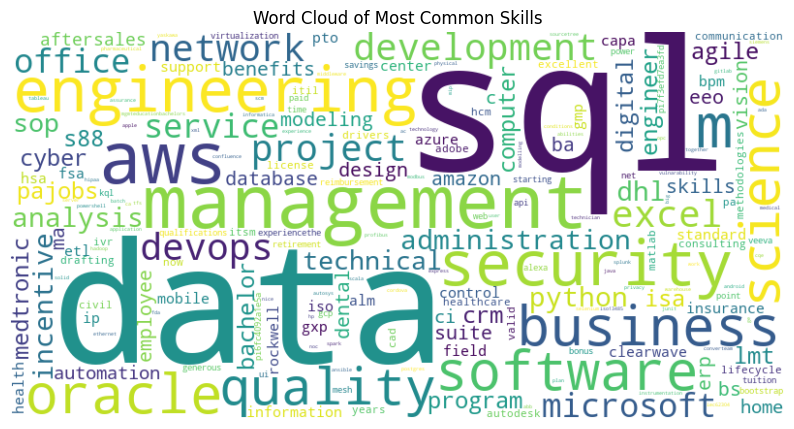

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "textcat"])

# Extract job descriptions and skills_desc
df['skills_desc'] = df['skills_desc'].fillna('')  # Fill NaNs without inplace
# df['description'] = df['description'].fillna('')  # Fill NaNs without inplace
text_data = (df['skills_desc']).tolist()  # Merge both columns for skill extraction Removed Description 

### Step 1: Use spaCy NER to Extract Skills ###
skills_list = []  # List to store extracted skills

for doc in nlp.pipe(text_data, batch_size=50, n_process=2):  # Batch processing for efficiency
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT", "WORK_OF_ART"]:  # These categories may contain skills
            skills_list.append(ent.text.lower())
print(len(skills_list))
skill_counts = Counter(skills_list).most_common(30)
print(skill_counts)
skill_freq_df = pd.DataFrame(skill_counts, columns=['Skill', 'Frequency'])
print(skill_freq_df)  # Display skill frequency table

### Step 3: Generate Word Cloud of Extracted Skills ###
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(skills_list))

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Skills")
plt.show()


In [19]:

# # Save the cleaned text data to a new file
output_csv = "computing_desc_job_posting.csv"


# # with open(output_file, "w", encoding="utf-8") as file:
# #     file.write("\n".join(df["clean_text"]))

# # print(f"Cleaned data saved to {output_file}")
# # # Save the cleaned dataset to a CSV file
# # output_csv = "cleaned_dataset.csv"

df.to_csv(output_csv, index=False, encoding="utf-8")

print(f"✅ Cleaned data saved to {output_csv}")

✅ Cleaned data saved to computing_desc_job_posting.csv


In [7]:
pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                 Skill  Frequency
0                29463         43
1                  sql         17
2                 java         17
3           experience         15
4                29462         15
5               python         14
6                  aws         11
7          engineering         11
8              ability         11
9               degree          8
10       related field          7
11            benefits          7
12            required          6
13    following skills          6
14   position requires          6
15  project management          6
16                well          6
17                 s88          6
18               agile          5
19            security          5
20     national origin          5
21            religion          5
22                race          5
23              dental          5
24               color          5
25              devops          5
26               years          5
27            employee          5
28          sa

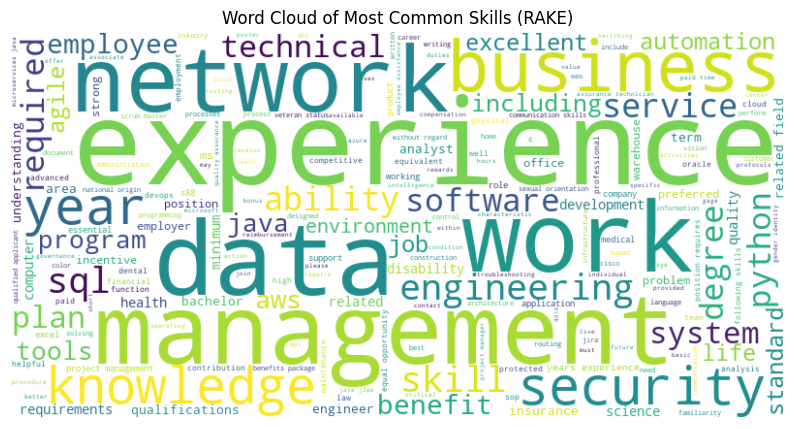

In [16]:
from rake_nltk import Rake

# Initialize RAKE for keyword extraction Unsupervised
rake = Rake()

# Apply RAKE on job descriptions
df['skills_desc'] = df['skills_desc'].fillna('')  # Fill NaNs without inplace
text_data = (df['skills_desc']).tolist()

# Extract skills using RAKE
skills_list = []
for text in text_data:
    rake.extract_keywords_from_text(text)
    skills_list.extend(rake.get_ranked_phrases())

# Get most common extracted skills
skill_counts = Counter(skills_list).most_common(30)
skill_freq_df = pd.DataFrame(skill_counts, columns=['Skill', 'Frequency'])
print(skill_freq_df)  # Display skill frequency table

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(skills_list))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Skills (RAKE)")
plt.show()


In [9]:
# !pip install spacy
# !python -m spacy download en_core_web_trf


In [10]:
# nltk.download('averaged_perceptron_tagger')

# # Apply POS tagging, Job roles such as Analyst will appear as (NOUN), Job skillsets such as SQL/PYTHON will appear as (PROPN). useful for NER later
# df["pos_tags"] = df["lemmatized_tokens"].apply(nltk.pos_tag)

# print(df.head(10))


In [11]:

# # Save the cleaned text data to a new file
# output_csv = "cleanned_desc_job_posting.csv"


# # with open(output_file, "w", encoding="utf-8") as file:
# #     file.write("\n".join(df["clean_text"]))

# # print(f"Cleaned data saved to {output_file}")
# # # Save the cleaned dataset to a CSV file
# # output_csv = "cleaned_dataset.csv"

# df.to_csv(output_csv, index=False, encoding="utf-8")

# print(f"✅ Cleaned data saved to {output_csv}")


In [12]:
# from nltk.chunk import ne_chunk

# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# # Apply Named Entity Recognition (NER)
# df["named_entities"] = df["pos_tags"].apply(ne_chunk)

# # Display first few rows
# print(df.head(10))


In [13]:
# import spacy
# # Download the English model
# import subprocess
# subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
# # Load spaCy's pretrained model (much faster than NLTK)
# nlp = spacy.load("en_core_web_sm")

# # Function to extract named entities
# def extract_entities(text):
#     doc = nlp(text)
#     return [(ent.text, ent.label_) for ent in doc.ents]  # Extract entity + label

# # Apply to dataset
# df["named_entities"] = df["clean_text"].apply(extract_entities)

# # Display results
# print(df.head(10))


Lists are important in this course because when we represent a piece of text in Python, we often represent it as a list of words first before we
perform any analysis on it.

Issue with list. Unlike other data types, when making a copy of a list object, any changes made to that copy would reflect in the original object. 

In [14]:
# import pandas as pd

# # Load the cleaned dataset with named entities
# file_path = "computing_job_postings.csv"

# df2 = pd.read_csv(file_path)

# # Check the first few rows
# print(df2.head(10))

# dataset_overview2 = {
#     "Number of Rows": df2.shape[0],
#     "Number of Columns": df2.shape[1],
#     "Missing Values": df2.isnull().sum().sum(),
#     "Duplicate Rows": df2.duplicated().sum(),
#     "Columns with Missing Values": df2.isnull().sum()[df2.isnull().sum() > 0].to_dict(),
# }
# print(dataset_overview2)


<b><i>How  to copy a list so that the copy have no relation to the original?<b><i>

By now you might have noticed that unlike some other programming languages such as C/C++ and Java, in Python variables are not associated with __fixed data types__, i.e., Python is a
__dynamically typed__ programming language. This means when we declare a
variable in Python, we do not need to specify its data type. A
variable’s data type may also change dynamically, as illustrated in the code below:


To find out the type of a variable, you can use the __type()__ function, as shown below. Note that whole numbers's type is __int__ while decimal numbers' type is __float__.